In [65]:
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [66]:
df = pd.read_csv("D:GC/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [67]:

df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

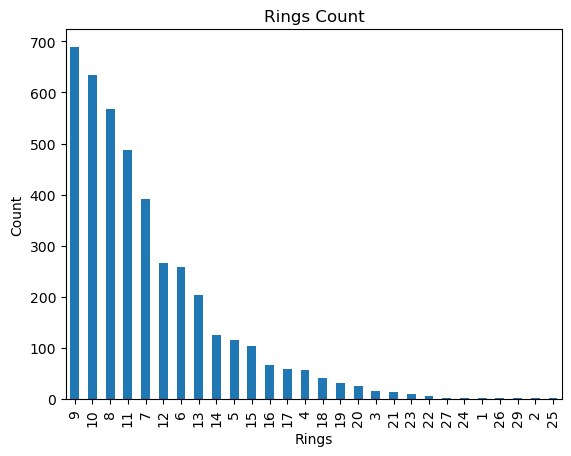

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Rings Count')
plt.xlabel('Rings')
plt.ylabel('Count')

In [69]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df['Sex']=label_encoder.fit_transform(df['Sex'])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [70]:
df=df.drop('id',axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [71]:
X=df.drop('Rings',axis=1)
y=df['Rings']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [73]:
import numpy as np
train_classes = np.unique(y_train)
test_classes = np.unique(y_test)

print("훈련 데이터의 고유 클래스:", train_classes)
print("테스트 데이터의 고유 클래스:", test_classes)

훈련 데이터의 고유 클래스: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27]
테스트 데이터의 고유 클래스: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 29]


In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 8), (1045, 8), (3132,), (1045,))

In [75]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [76]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test]

In [77]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3130, 3, 8) (3130,)
(1043, 3, 8) (1043,)


In [78]:
from keras.utils import to_categorical
# Convert output variables to categorical for CNN


# 훈련 데이터 및 테스트 데이터에 대해 동일한 클래스 수 사용
y_train_seq = to_categorical(y_train_seq,num_classes=30)  #num_classes로 지정해주지 않을경우 27이나옴
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq,num_classes=30) #num_classes로 지정해주지 않을경우 29가나옴
print(y_test_seq.shape)

(3130, 30)
(1043, 30)


In [79]:
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 8 30


In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [82]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(Dropout(0.2))  # Dropout 추가
model.add(LSTM(units=128))
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 3, 128)              │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,110 (867.62 KB)

 Trainable params: 222,110 (867.62 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:

history = model.fit(X_train_seq, y_train_seq, epochs = 100, batch_size = 256, validation_split = 0.1, shuffle = True)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1971 - loss: 2.2901 - val_accuracy: 0.1502 - val_loss: 2.2707
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1826 - loss: 2.2960 - val_accuracy: 0.2045 - val_loss: 2.2490
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2188 - loss: 2.2518 - val_accuracy: 0.2204 - val_loss: 2.2326
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2091 - loss: 2.2787 - val_accuracy: 0.2045 - val_loss: 2.2184
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2256 - loss: 2.2521 - val_accuracy: 0.1917 - val_loss: 2.2260
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1965 - loss: 2.2509 - val_accuracy: 0.2428 - val_loss: 2.1936
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2077 - loss: 2.2224 - val_accuracy: 0.2109 - val_loss: 2.2282
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2096 - loss: 2.2718 - val_accuracy: 0.

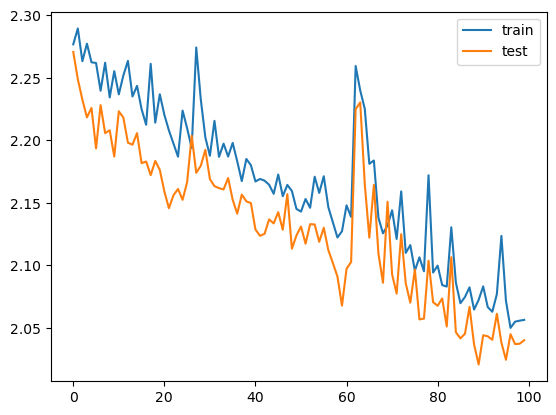

In [85]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [86]:

model.evaluate(X_train_seq, y_train_seq)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2382 - loss: 2.0278


[2.024388074874878, 0.25015974044799805]

In [87]:

model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2429 - loss: 2.1291


[2.0751707553863525, 0.23969319462776184]

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Confusion Matrix


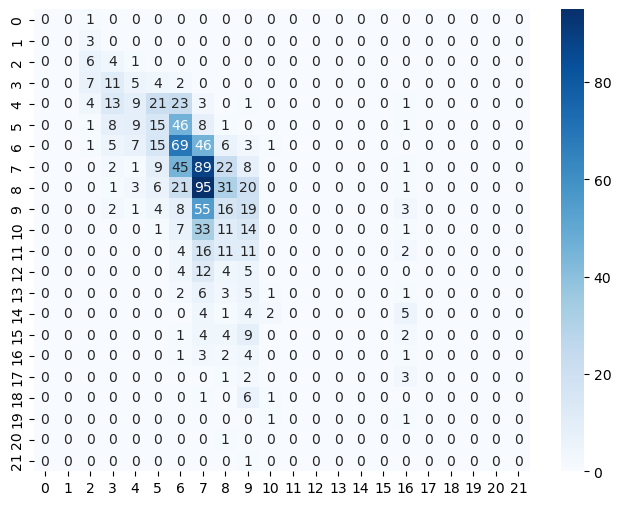

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [89]:
base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file='D:GC/abalone_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2429 - loss: 2.1291


model saved at  D:GC/abalone_model.h5
Accuracy >23.969319
Base Loss >2.08


In [90]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [91]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2429 - loss: 2.1291


[2.0751707553863525, 0.23969319462776184]

In [92]:

base_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2429 - loss: 2.1291


[2.0751707553863525, 0.23969319462776184]

In [93]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  6


In [95]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(30, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 30)                  │         222,110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,044 (882.98 KB)

 Trainable params: 3,934 (15.37 KB)

 Non-trainable params: 222,110 (867.62 KB)

In [96]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential_1, built=True>",sequential_1,False
1,"<Dense name=dense_6, built=True>",dense_6,True
2,"<Dense name=dense_7, built=True>",dense_7,True


In [98]:

history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2674 - loss: 2.0414 - val_accuracy: 0.2396 - val_loss: 2.0074
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2686 - loss: 2.0474 - val_accuracy: 0.2173 - val_loss: 2.0116
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2515 - loss: 2.0525 - val_accuracy: 0.2428 - val_loss: 2.0135
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2576 - loss: 2.0484 - val_accuracy: 0.2588 - val_loss: 2.0107
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2620 - loss: 2.0386 - val_accuracy: 0.2268 - val_loss: 2.0091
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2560 - loss: 2.0780 - val_accuracy: 0.2396 - val_loss: 2.0087
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2738 - loss: 2.0042 - val_accuracy: 0.2364 - val_loss: 2.0150
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2439 - loss: 2.0424 - val_accuracy: 0.2524 - v

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 30)                  │         222,110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,914 (913.73 KB)

 Trainable params: 3,934 (15.37 KB)

 Non-trainable params: 222,110 (867.62 KB)

 Optimizer params: 7,870 (30.75 KB)

In [99]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2511 - loss: 2.1226


[2.0737078189849854, 0.2406519651412964]

In [100]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [101]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential_1, built=True>",sequential_1,True
1,"<Dense name=dense_6, built=True>",dense_6,True
2,"<Dense name=dense_7, built=True>",dense_7,True


In [104]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2823 - loss: 1.9708 - val_accuracy: 0.2428 - val_loss: 2.0373
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2619 - loss: 1.9786 - val_accuracy: 0.2364 - val_loss: 2.0225
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2848 - loss: 1.9402 - val_accuracy: 0.2524 - val_loss: 2.0086
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2755 - loss: 1.9862 - val_accuracy: 0.2556 - val_loss: 2.0305
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2611 - loss: 1.9953 - val_accuracy: 0.2364 - val_loss: 2.0426
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2717 - loss: 2.0136 - val_accuracy: 0.2460 - val_loss: 1.9982
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2812 - loss: 1.9548 - val_accuracy: 0.2268 - val_loss: 2.0014
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2910 - loss: 1.9272 - val_accuracy: 0.2588 - v

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 30)                  │         222,110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 678,134 (2.59 MB)

 Trainable params: 226,044 (882.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 452,090 (1.72 MB)

In [105]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2761 - loss: 2.2295


[2.178661823272705, 0.2579098641872406]